In [3]:
import torchaudio
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [4]:
x = (torch.rand((8, 16000)) - 0.5)*2

In [5]:

spec_transform  = torchaudio.transforms.Spectrogram(power=None)
time_stretch = torchaudio.transforms.TimeStretch()
freq_masking = torchaudio.transforms.FrequencyMasking(freq_mask_param=25)
invspec_transform = torchaudio.transforms.InverseSpectrogram()

time_mask_param = torch.round(torch.tensor(x.size(-1)/180 * 0.1))
time_masking = torchaudio.transforms.TimeMasking(time_mask_param=time_mask_param)



x_s = transform(x)
# Time stretch
x_s = time_stretch(x_s, (0.8 - 1.2)*torch.rand(1)[0]+1.2)
# Freq masking
# Real
seed = torch.seed()
x_r = freq_masking(x_s.real)
x_r = freq_masking(x_r)
x_r = time_masking(x_r)
x_r = time_masking(x_r)

# Imag
torch.manual_seed(seed)
x_i = freq_masking(x_s.imag)
x_i = freq_masking(x_i)
x_i = time_masking(x_i)
x_i = time_masking(x_i)

# Combine
x_s = torch.complex(x_r, x_i)

x_prime = inv_transform(x_s.type(torch.complex64))

TypeError: 'Tensor' object is not callable

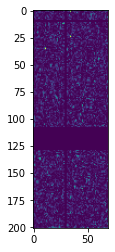

In [80]:
x_s = x_s.to(torch.double)
plt.imshow(x_s[0]**2)

In [2]:
import sys
import torch
sys.path.append('..')

from utils.transforms import wav_specaugment

x = torch.zeros((8, 16000))
x_t = wav_specaugment(x)

RuntimeError: stft input and window must be on the same device but got self on cuda:0 and window on cpu

: 